In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, division
from io import open
import numpy as np
import glob
import os
import string
from matplotlib import pyplot as plt

In [3]:
from utils.vector_data_util import *
from utils.img_util import *

In [4]:
print(find_files('annotations'))

['annotations_train_24_jan/standingline_annotations.txt', 'annotations_train_24_jan/slantingline_annotations.txt', 'annotations_train_24_jan/rectangle_annotations.txt', 'annotations_train_24_jan/square_annotations.txt', 'annotations_train_24_jan/traingle_annotations.txt', 'annotations_train_24_jan/circle_annotations.txt', 'annotations_train_24_jan/sleepingline_annotations.txt', 'annotations_train_24_jan/parallelogram_annotations.txt']


In [5]:
all_lines, all_categories, category_lines = get_training_data('annotations')
n_categories = len(all_categories)

In [6]:
print("num classes :",n_categories)
print("classes :", all_categories)
print("data size", len(all_lines))

num classes : 8
classes : ['standingline', 'slantingline', 'rectangle', 'square', 'traingle', 'circle', 'sleepingline', 'parallelogram']
data size 16000


In [7]:
lens= [len(line) for line in all_lines]
arr = np.array(lens)
print("avg number of instructions per category would be ", np.mean(arr)/6 * 3)

avg number of instructions per category would be  122.53028125


In [9]:
instr_list = get_instruction_set()
print(len(instr_list))

128


In [10]:
instr_list = update_instruction_set(instr_list,all_lines)
print(len(instr_list))
print(instr_list)

outliers set size 0  # of occurances 0
outliers  set()
128
[',', -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


Now we have ``category_lines``, a dictionary mapping each category
(language) to a list of lines (names). We also kept track of
``all_categories`` (just a list of languages) and ``n_categories`` for
later reference.




In [11]:
print(category_lines['slantingline'][:5])

['(57,43);(-1,0);(-1,1);(-1,0);(-1,0);(-1,1);(-1,0);(-1,0);(-1,1);(-1,0);(-1,0);(-1,0);(-1,1);(-1,0);(-1,0);(-1,1);(-1,0);(-1,0);(-1,1);(-1,0);(38,49)', '(97,61);(-2,-6);(-2,-7);(-2,-6);(-2,-6);(-2,-6);(-2,-7);(-2,-6);(-1,-3);(82,14)', '(77,1);(4,8);(4,7);(4,8);(2,4);(91,28)', '(40,4);(2,2);(2,3);(2,2);(2,2);(2,3);(2,2);(2,2);(2,2);(2,3);(2,2);(2,2);(2,3);(2,2);(2,2);(2,3);(2,2);(2,2);(2,3);(2,2);(1,1);(79,49)', '(74,1);(4,2);(4,2);(2,1);(84,6)']


In [13]:
import random

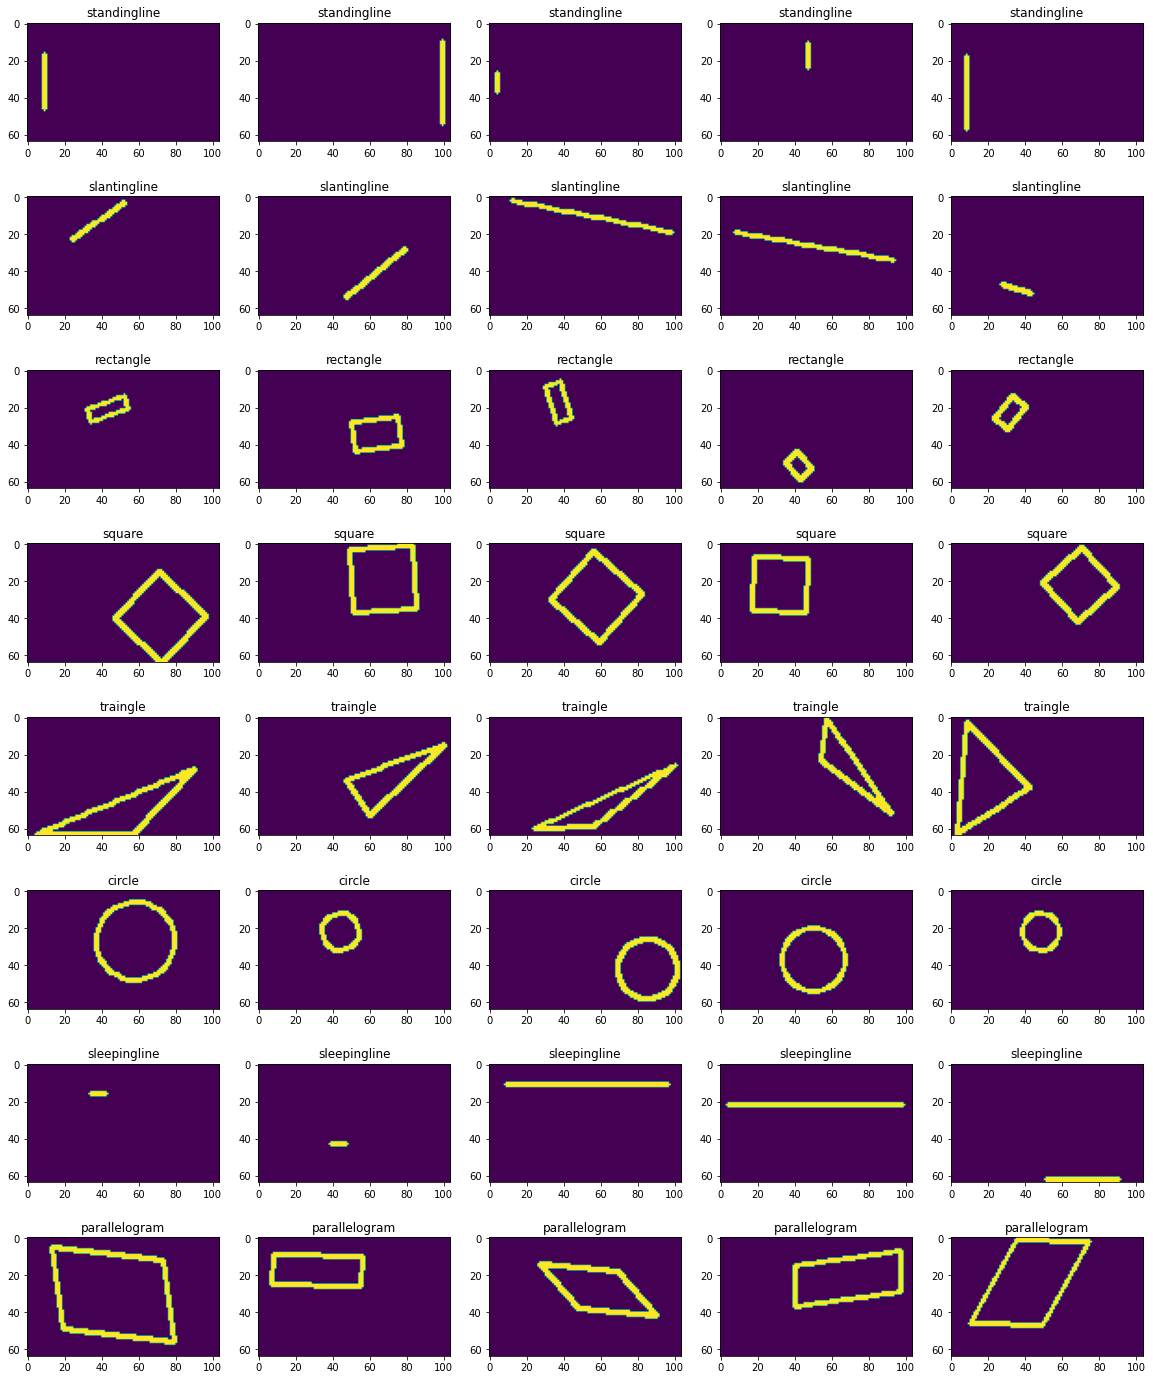

In [14]:
fig = plt.figure(figsize=(20,25))
cols = 5

rows = n_categories

i=1
for category,samples in category_lines.items():
    j=0    
    while j < cols :
        sample = random.choice(samples)
        im = get_shape_img(sample)
        ax = plt.subplot(rows,cols,i)
        ax.set_title(category)
        plt.imshow(im)
        i+=1
        j+=1